In [454]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [455]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import load_digits
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn import svm
import warnings
warnings.simplefilter("ignore")

In [456]:
df= pd.read_csv(r"C:\Users\USER\OneDrive\Desktop\DA\Python\credit_card_transactions.csv")
df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0,NaN
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0,22630.0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0,88351.0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0,69367.0


In [457]:
df.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
merch_zipcode            float64
dtype: object

In [458]:
df.shape

(1296675, 24)

In [459]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.100702e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03,4.682575e+04
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02,2.583400e+04
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00,1.001000e+03
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00,2.511400e+04
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00,4.586000e+04
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00,6.831900e+04
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00,9.940300e+04


In [460]:
df.describe(include="object")

,trans_date_trans_time,merchant,category,first,last,gender,street,city,state,job,dob,trans_num
count,1296675,1296675,1296675,1296675,1296675,1296675,1296675,1296675,1296675,1296675,1296675,1296675
unique,1274791,693,14,352,481,2,983,894,51,494,968,1296675
top,2019-04-22 16:02:01,fraud_Kilback LLC,gas_transport,Christopher,Smith,F,0069 Robin Brooks Apt. 695,Birmingham,TX,Film/video editor,1977-03-23,0b242abb623afc578575680df30655b9
freq,4,4403,131659,26669,28794,709863,3123,5617,94876,9779,5636,1


In [461]:
df.isnull().sum()

Unnamed: 0                    0
trans_date_trans_time         0
cc_num                        0
merchant                      0
category                      0
amt                           0
first                         0
last                          0
gender                        0
street                        0
city                          0
state                         0
zip                           0
lat                           0
long                          0
city_pop                      0
job                           0
dob                           0
trans_num                     0
unix_time                     0
merch_lat                     0
merch_long                    0
is_fraud                      0
merch_zipcode            195973
dtype: int64

In [462]:
df.fillna(method="ffill",inplace=True)
df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,28705.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,83236.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0,68837.0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0,22630.0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0,88351.0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0,69367.0


In [463]:
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
merch_zipcode            0
dtype: int64

In [464]:
print(df.head())
print(df.info())

   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      long city_pop  \
0    Banks      F                561 Perry Cove  ...  -81.1781     3495   
1     Gill      F  43039 Riley Greens Suite 393  ... -11

In [465]:
df['is_fraud'].unique()

array([0, 1], dtype=int64)

In [466]:
df['is_fraud'].value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

In [467]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df = df.drop('trans_date_trans_time',axis=1)
df.drop('cc_num',axis = 1,inplace = True)
df.drop('first',axis=1,inplace=True)
df.drop('last',axis=1,inplace=True)
df.drop('street',axis=1,inplace=True)
df.drop('city',axis=1,inplace=True)
df.drop('zip',axis=1,inplace=True)
df.drop('lat',axis=1,inplace=True)
df.drop('long',axis=1,inplace=True)
df.drop('city_pop',axis=1,inplace=True)
df.drop('trans_num',axis=1,inplace=True)
df.drop('unix_time',axis=1,inplace=True)
df.drop('merch_lat',axis=1,inplace=True)
df.drop('merch_long',axis = 1,inplace = True)

In [468]:
df

,merchant,category,amt,gender,state,job,dob,is_fraud,merch_zipcode
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,NC,"Psychologist, counselling",1988-03-09,0,28705.0
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,WA,Special educational needs teacher,1978-06-21,0,28705.0
2,fraud_Lind-Buckridge,entertainment,220.11,M,ID,Nature conservation officer,1962-01-19,0,83236.0
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,MT,Patent attorney,1967-01-12,0,83236.0
4,fraud_Keeling-Crist,misc_pos,41.96,M,VA,Dance movement psychotherapist,1986-03-28,0,22844.0
...,...,...,...,...,...,...,...,...,...
1296670,fraud_Reichel Inc,entertainment,15.56,M,UT,Geoscientist,1961-11-24,0,68837.0
1296671,fraud_Abernathy and Sons,food_dining,51.70,M,MD,"Production assistant, television",1979-12-11,0,22630.0
1296672,fraud_Stiedemann Ltd,food_dining,105.93,M,NM,Naval architect,1967-08-30,0,88351.0
1296673,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,M,SD,Volunteer coordinator,1980-08-18,0,69367.0


In [469]:
df.columns

Index(['merchant', 'category', 'amt', 'gender', 'state', 'job', 'dob',
       'is_fraud', 'merch_zipcode'],
      dtype='object')

In [470]:
print(df.select_dtypes("number").columns) # To select the numeric columns from the df

Index(['amt', 'is_fraud', 'merch_zipcode'], dtype='object')


In [510]:
df['dob'] = pd.to_datetime(df['dob'])

In [512]:
current_year = pd.Timestamp.now().year
df['age'] = current_year - df['dob'].dt.year

In [516]:
df

,merchant,category,amt,gender,state,job,dob,is_fraud,merch_zipcode,age
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,NC,"Psychologist, counselling",1988-03-09,0,28705.0,36
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,WA,Special educational needs teacher,1978-06-21,0,28705.0,46
2,fraud_Lind-Buckridge,entertainment,220.11,M,ID,Nature conservation officer,1962-01-19,0,83236.0,62
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,MT,Patent attorney,1967-01-12,0,83236.0,57
4,fraud_Keeling-Crist,misc_pos,41.96,M,VA,Dance movement psychotherapist,1986-03-28,0,22844.0,38
...,...,...,...,...,...,...,...,...,...,...
1296670,fraud_Reichel Inc,entertainment,15.56,M,UT,Geoscientist,1961-11-24,0,68837.0,63
1296671,fraud_Abernathy and Sons,food_dining,51.70,M,MD,"Production assistant, television",1979-12-11,0,22630.0,45
1296672,fraud_Stiedemann Ltd,food_dining,105.93,M,NM,Naval architect,1967-08-30,0,88351.0,57
1296673,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,M,SD,Volunteer coordinator,1980-08-18,0,69367.0,44


In [518]:
df.drop('dob',axis = 1,inplace = True)

In [520]:
df

,merchant,category,amt,gender,state,job,is_fraud,merch_zipcode,age
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,NC,"Psychologist, counselling",0,28705.0,36
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,WA,Special educational needs teacher,0,28705.0,46
2,fraud_Lind-Buckridge,entertainment,220.11,M,ID,Nature conservation officer,0,83236.0,62
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,MT,Patent attorney,0,83236.0,57
4,fraud_Keeling-Crist,misc_pos,41.96,M,VA,Dance movement psychotherapist,0,22844.0,38
...,...,...,...,...,...,...,...,...,...
1296670,fraud_Reichel Inc,entertainment,15.56,M,UT,Geoscientist,0,68837.0,63
1296671,fraud_Abernathy and Sons,food_dining,51.70,M,MD,"Production assistant, television",0,22630.0,45
1296672,fraud_Stiedemann Ltd,food_dining,105.93,M,NM,Naval architect,0,88351.0,57
1296673,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,M,SD,Volunteer coordinator,0,69367.0,44


In [522]:
# Define Age Group
    
bins = [18,25,35,45,55,65,75,85,95,105]
labels = [' 18-25',' 26-35 ',' 36-45 ',' 46-55 ',' 56-65 ',' 66-75 ',' 76-85 ',' 86-95 ',' 96-105']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Check segments

df[['age','age_group','gender','state']]

,age,age_group,gender,state
0,36,36-45,F,NC
1,46,46-55,F,WA
2,62,56-65,M,ID
3,57,56-65,M,MT
4,38,36-45,M,VA
...,...,...,...,...
1296670,63,56-65,M,UT
1296671,45,46-55,M,MD
1296672,57,56-65,M,NM
1296673,44,36-45,M,SD


In [524]:
df

,merchant,category,amt,gender,state,job,is_fraud,merch_zipcode,age,age_group
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,NC,"Psychologist, counselling",0,28705.0,36,36-45
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,WA,Special educational needs teacher,0,28705.0,46,46-55
2,fraud_Lind-Buckridge,entertainment,220.11,M,ID,Nature conservation officer,0,83236.0,62,56-65
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,MT,Patent attorney,0,83236.0,57,56-65
4,fraud_Keeling-Crist,misc_pos,41.96,M,VA,Dance movement psychotherapist,0,22844.0,38,36-45
...,...,...,...,...,...,...,...,...,...,...
1296670,fraud_Reichel Inc,entertainment,15.56,M,UT,Geoscientist,0,68837.0,63,56-65
1296671,fraud_Abernathy and Sons,food_dining,51.70,M,MD,"Production assistant, television",0,22630.0,45,46-55
1296672,fraud_Stiedemann Ltd,food_dining,105.93,M,NM,Naval architect,0,88351.0,57,56-65
1296673,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,M,SD,Volunteer coordinator,0,69367.0,44,36-45


In [526]:
df.columns

Index(['merchant', 'category', 'amt', 'gender', 'state', 'job', 'is_fraud',
       'merch_zipcode', 'age', 'age_group'],
      dtype='object')

# EDA ( exploratory data analysis (plots) )

# Analyzing Spending Patterns within each  segments

In [530]:
# Calculate total and average spending by age_group

age_spending = df.groupby('age_group')['amt'].agg(['sum','mean']).reset_index() # (agg-aggregate value)

In [532]:
import seaborn as sns

# Plot spending patterns by age group

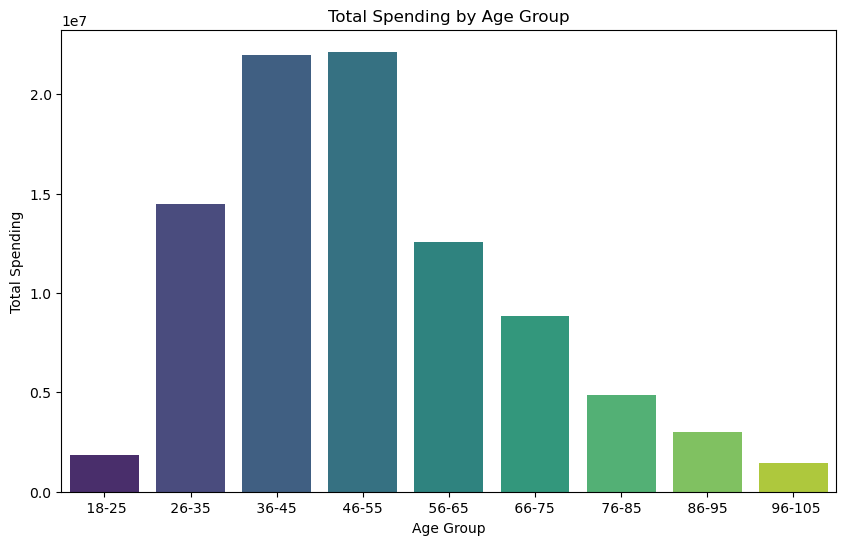

In [602]:
plt.figure(figsize=(10,6))
sns.barplot(data=age_spending, x='age_group', y='sum', palette= 'viridis')
plt.title('Total Spending by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Spending')
plt.savefig('Total Spending by Age Group.png')
plt.show()

# Calculate total and average spending by gender

In [539]:
gender_spending = df.groupby('gender')['amt'].agg(['sum','mean']).reset_index()

# Plot Spending Patterns by Gender

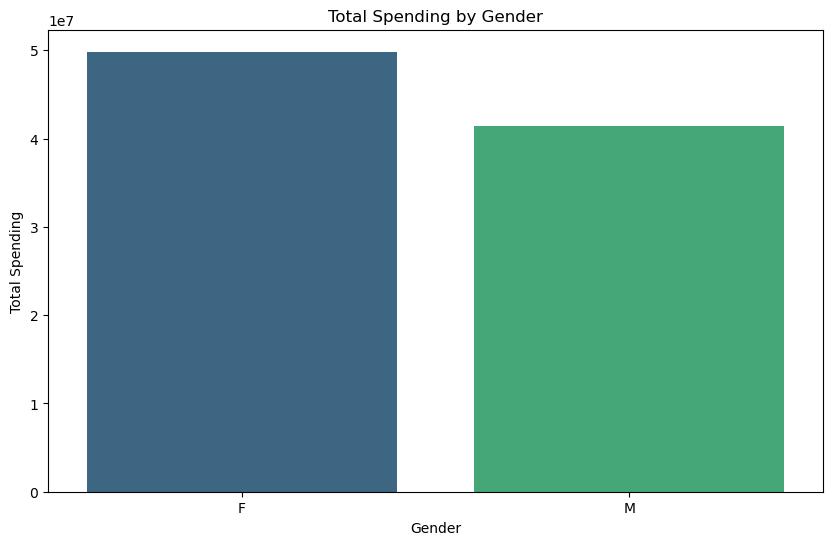

In [541]:
plt.figure(figsize=(10,6))
sns.barplot(data=gender_spending, x='gender', y='sum', palette='viridis')
plt.title('Total Spending by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Spending')
plt.show()

# Calculate total and average spending by State

In [543]:
state_spending = df.groupby('state')['amt'].agg(['sum','mean']).reset_index()

 # Plot Spending Patterns by State

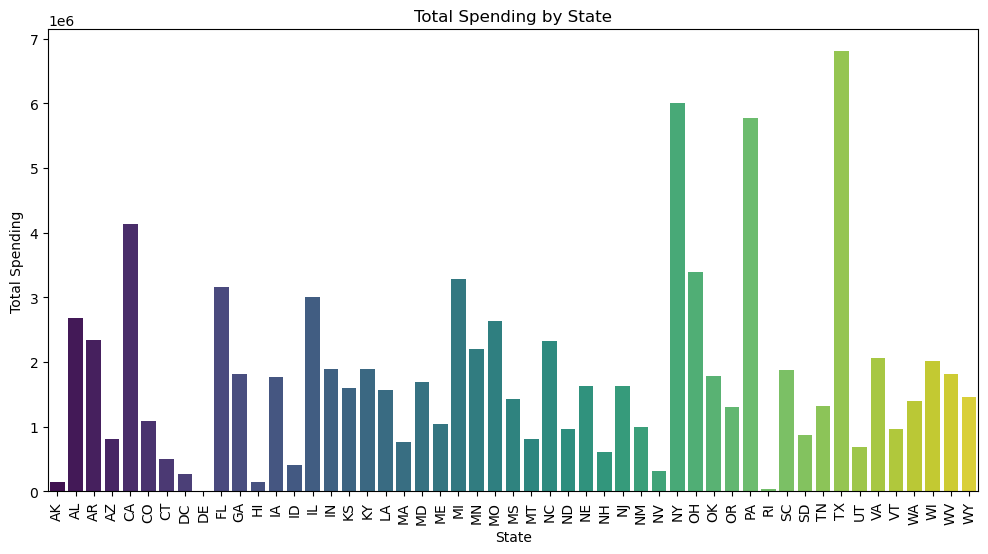

In [545]:
plt.figure(figsize=(12,6))
sns.barplot(data=state_spending, x='state',y='sum',palette='viridis')
plt.title('Total Spending by State')
plt.xlabel('State') # TX - Texas.It is a large state located in the southern part of the United States
plt.ylabel('Total Spending')
plt.xticks(rotation=90)
plt.show()

# Age Group Spending Distribution

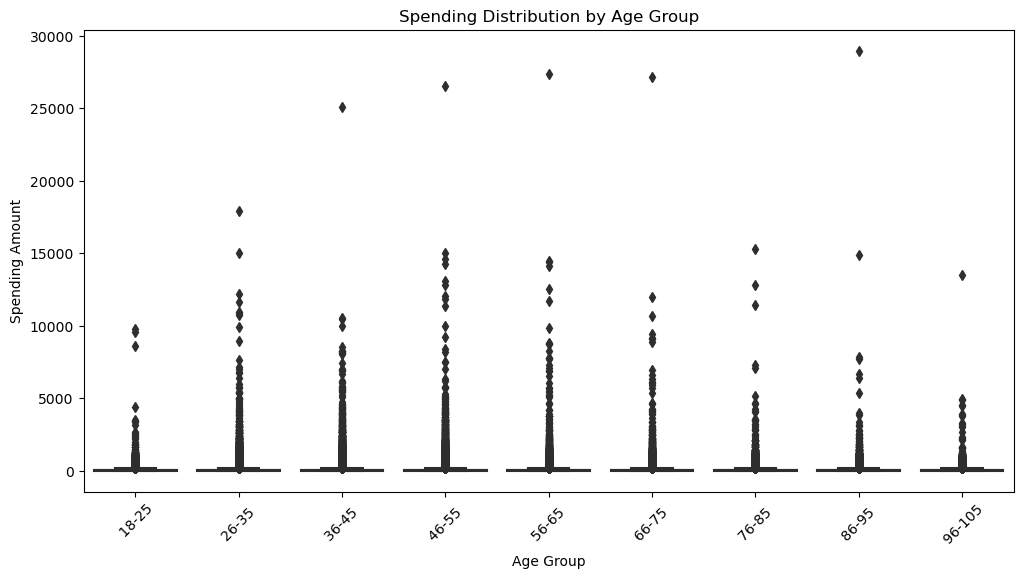

In [547]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='age_group', y='amt', palette='viridis')
plt.title('Spending Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Spending Amount')
plt.xticks(rotation=45)
plt.show()

# Gender Spending Comparison

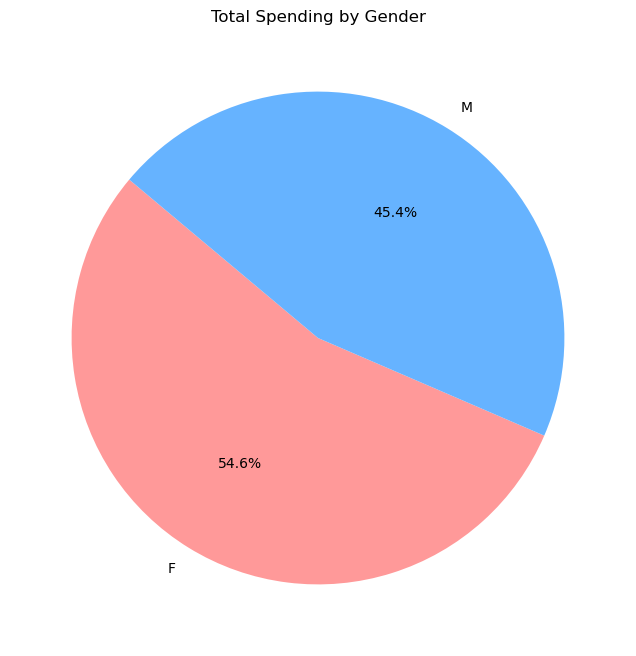

In [549]:
gender_spending_pie = gender_spending.set_index('gender')['sum']
plt.figure(figsize=(8,8))
plt.pie(gender_spending_pie, labels=gender_spending_pie.index,autopct='%1.1f%%', colors=['#ff9999','#66b3ff'], startangle=140)
plt.title('Total Spending by Gender')
plt.show()

# Customer Lifetime Value by Age Group

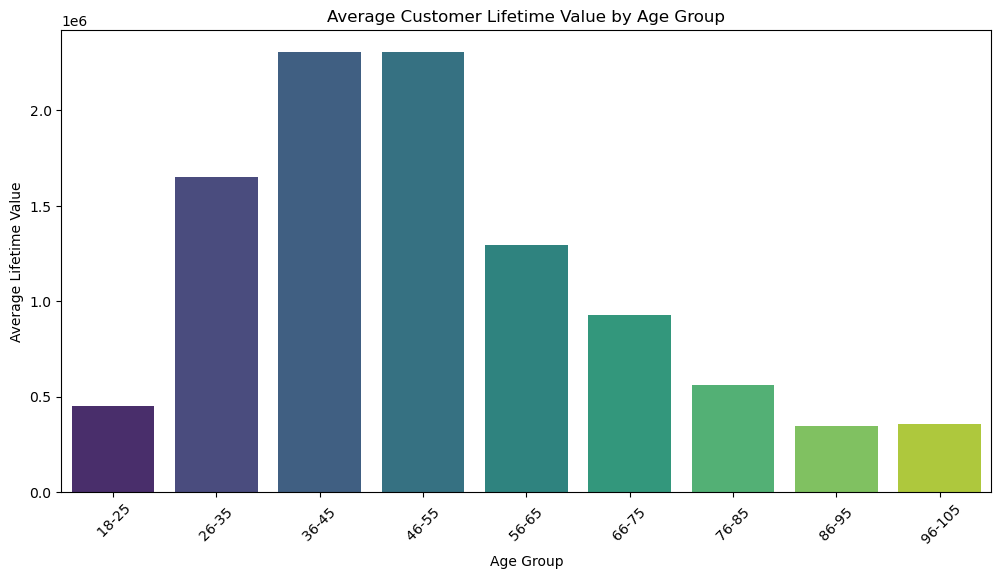

In [551]:
# Calculate lifetime value for each customer
customer_lifetime_value = df.groupby('age')['amt'].sum().reset_index()
df['customer_lifetime_value'] = df['age'].map(customer_lifetime_value.set_index('age')['amt'])

# Segment by age group
age_lifetime_value = df.groupby('age_group')['customer_lifetime_value'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=age_lifetime_value, x='age_group', y='customer_lifetime_value', palette='viridis')
plt.title('Average Customer Lifetime Value by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Lifetime Value')
plt.xticks(rotation=45)
plt.show()

# Spending by Product Category

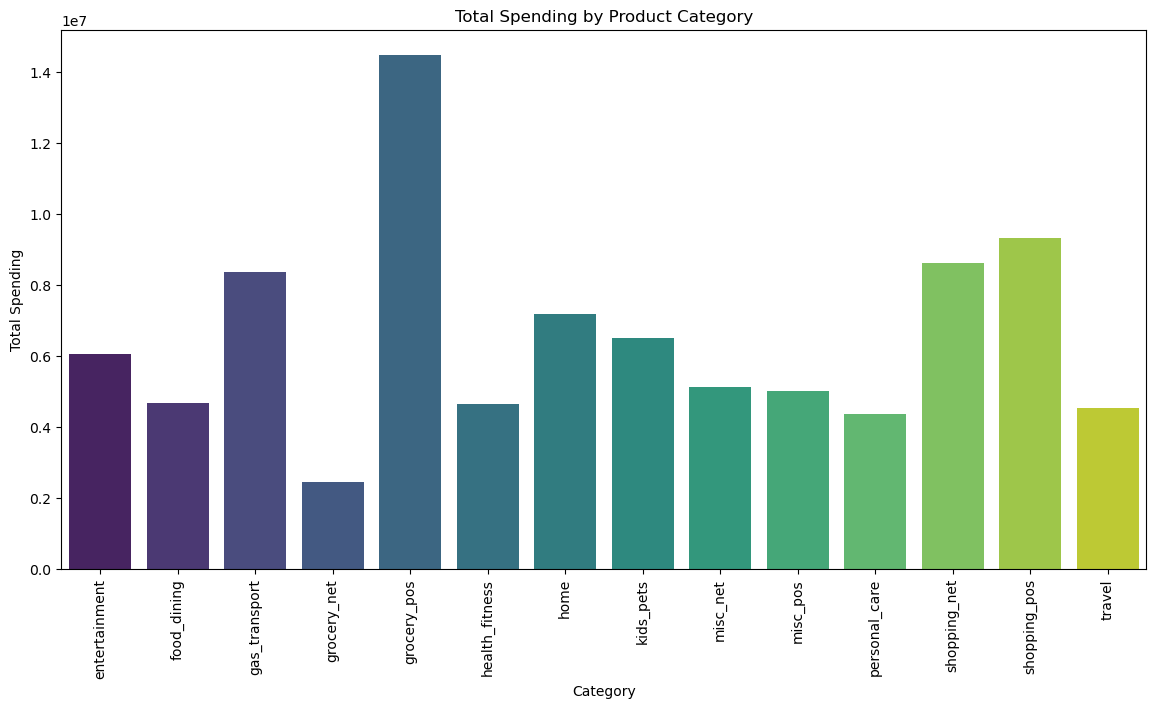

In [553]:
category_spending = df.groupby('category')['amt'].sum().reset_index()

plt.figure(figsize=(14, 7))
sns.barplot(data=category_spending, x='category', y='amt', palette='viridis')
plt.title('Total Spending by Product Category')
plt.xlabel('Category')
plt.ylabel('Total Spending')
plt.xticks(rotation=90)
plt.show()

# Customer Spend vs. Age

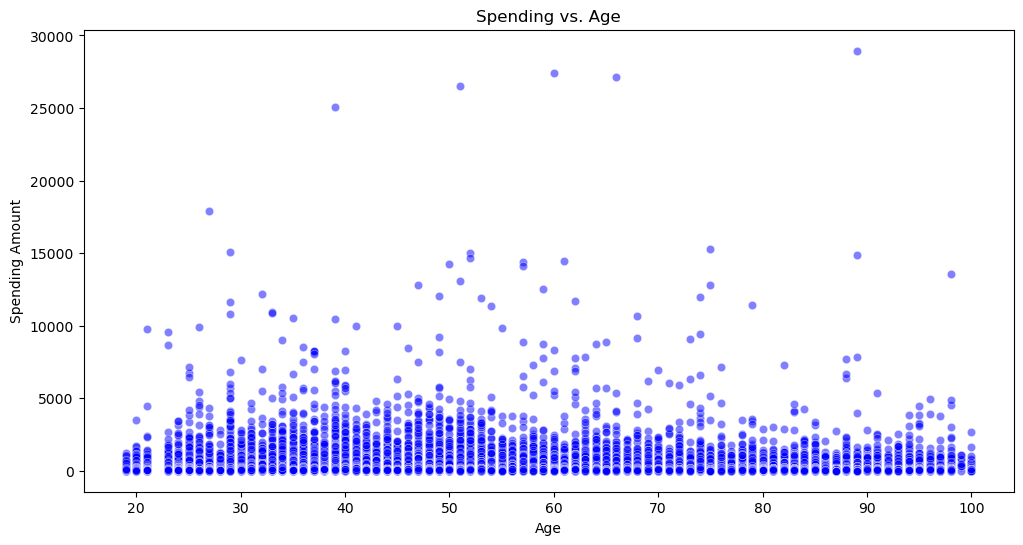

In [555]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='age', y='amt', alpha=0.5, color='b')
plt.title('Spending vs. Age')
plt.xlabel('Age')
plt.ylabel('Spending Amount')
plt.show()

# Spending Comparison Across Different States

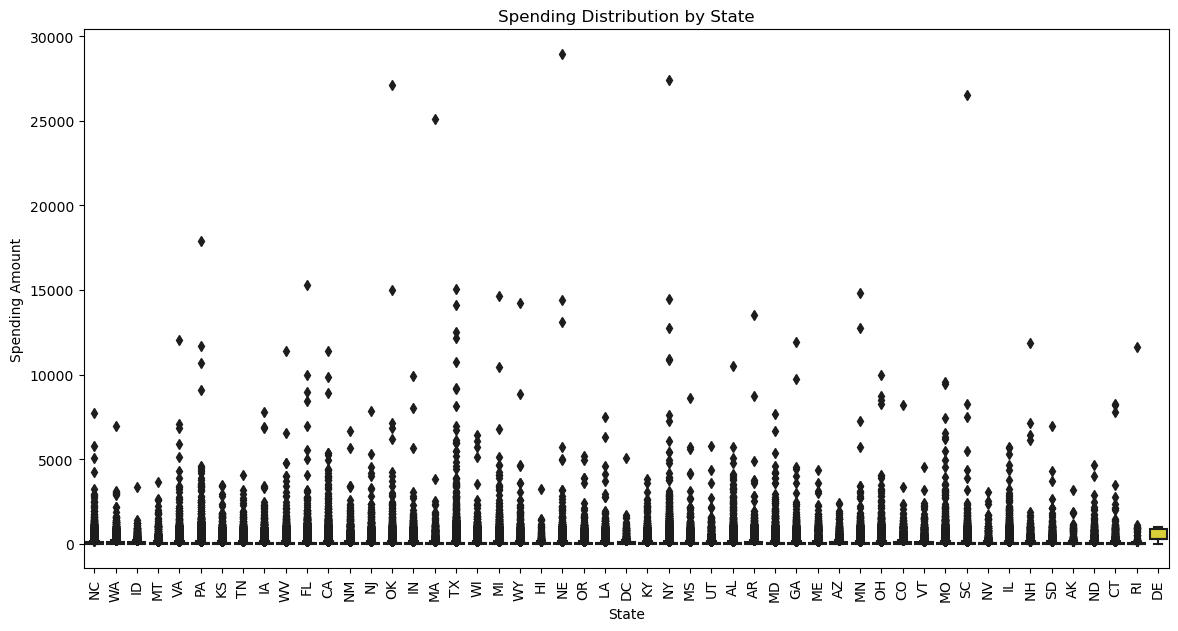

In [557]:
plt.figure(figsize=(14, 7))
sns.boxplot(data=df, x='state', y='amt', palette='viridis')
plt.title('Spending Distribution by State')
plt.xlabel('State') # NE -  Nebraska.It is a state located in the central region of the United States.
plt.ylabel('Spending Amount')
plt.xticks(rotation=90)
plt.show()


# Finding Outliers 

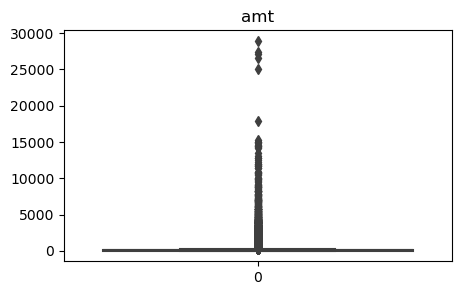

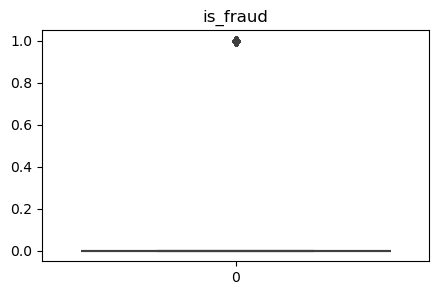

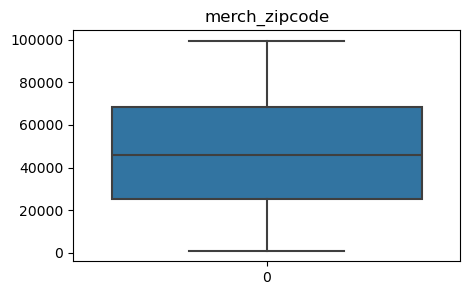

In [559]:
for col in['amt','is_fraud','merch_zipcode']:
    plt.figure(figsize=(5,3))  # To create a new figure for each boxplot
    sns.boxplot(df[col])
    plt.title(col)    # Optionally add a title to each plot
    plt.show()        # To display each boxplot
                  #fill outlier of column 'amt','is_fraud' with mean

In [560]:
for col in ['amt']:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Define outlier bounds
        lower_limit=Q1-1.5*IQR
        upper_limit=Q3+1.5*IQR
        print(col)
        print(f"{lower_limit},{upper_limit}")
        print("*"*20)

        # Calculate the median of the column
        mean_value = df[col].mean()

        # Replace outliers with the median value
        df[col] = np.where((df[col] < lower_limit) | (df[col] > upper_limit), mean_value, df[col])
        df

amt
-100.58499999999998,193.375
********************


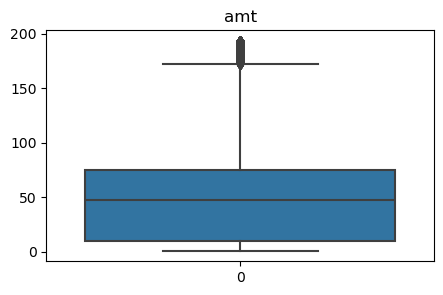

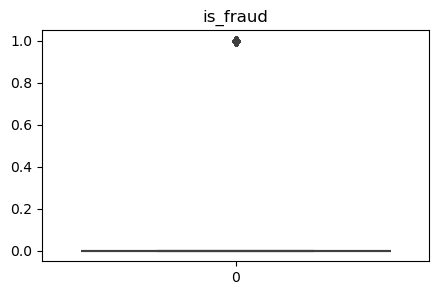

In [561]:
for col in['amt','is_fraud']:
    plt.figure(figsize=(5,3))  # To create a new figure for each boxplot
    sns.boxplot(df[col])
    plt.title(col)    # Optionally add a title to each plot
    plt.show()        # To display each boxplot
                      #fill outlier of column 'amt','is_fraud' with mean

In [562]:
for col in ['amt']:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Define outlier bounds
        lower_limit=Q1-1.5*IQR
        upper_limit=Q3+1.5*IQR
        print(col)
        print(f"{lower_limit},{upper_limit}")
        print("*"*20)

        # Calculate the median of the column
        median_value = df[col].median()

        # Replace outliers with the median value
        df[col] = np.where((df[col] < lower_limit) | (df[col] > upper_limit), median_value, df[col])
        df

amt
-88.06,172.5
********************


In [563]:
for col in ['amt']:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Define outlier bounds
        lower_limit=Q1-1.5*IQR
        upper_limit=Q3+1.5*IQR
        print(col)
        print(f"{lower_limit},{upper_limit}")
        print("*"*20)

        # Calculate the median of the column
        mean_value = df[col].mean()

        # Replace outliers with the median value
        df[col] = np.where((df[col] < lower_limit) | (df[col] > upper_limit), mean_value, df[col])
        df

amt
-85.47999999999999,168.2
********************


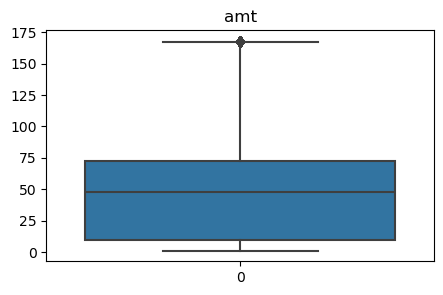

In [564]:
for col in['amt']:
    plt.figure(figsize=(5,3))  # To create a new figure for each boxplot
    sns.boxplot(df[col])
    plt.title(col)    # Optionally add a title to each plot
    plt.show()        # To display each boxplot

In [565]:
df['is_fraud'].value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

In [566]:
df

,merchant,category,amt,gender,state,job,is_fraud,merch_zipcode,age,age_group,customer_lifetime_value
0,"fraud_Rippin, Kub and Mann",misc_net,4.970000,F,NC,"Psychologist, counselling",0,28705.0,36,36-45,2267165.94
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230000,F,WA,Special educational needs teacher,0,28705.0,46,46-55,2396516.53
2,fraud_Lind-Buckridge,entertainment,70.351035,M,ID,Nature conservation officer,0,83236.0,62,56-65,1526544.09
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000000,M,MT,Patent attorney,0,83236.0,57,56-65,1499640.53
4,fraud_Keeling-Crist,misc_pos,41.960000,M,VA,Dance movement psychotherapist,0,22844.0,38,36-45,2401606.69
...,...,...,...,...,...,...,...,...,...,...,...
1296670,fraud_Reichel Inc,entertainment,15.560000,M,UT,Geoscientist,0,68837.0,63,56-65,1167201.01
1296671,fraud_Abernathy and Sons,food_dining,51.700000,M,MD,"Production assistant, television",0,22630.0,45,46-55,1342470.06
1296672,fraud_Stiedemann Ltd,food_dining,105.930000,M,NM,Naval architect,0,88351.0,57,56-65,1499640.53
1296673,"fraud_Reinger, Weissnat and Strosin",food_dining,74.900000,M,SD,Volunteer coordinator,0,69367.0,44,36-45,1905492.23


In [567]:
df.columns

Index(['merchant', 'category', 'amt', 'gender', 'state', 'job', 'is_fraud',
       'merch_zipcode', 'age', 'age_group', 'customer_lifetime_value'],
      dtype='object')

In [568]:
df.dtypes

merchant                     object
category                     object
amt                         float64
gender                       object
state                        object
job                          object
is_fraud                      int64
merch_zipcode               float64
age                           int32
age_group                  category
customer_lifetime_value     float64
dtype: object

In [569]:
encoder = OrdinalEncoder()


In [570]:
# List of columns to encode
columns_to_encode = ['merchant', 'category', 'gender',"state","job"]

# Apply OrdinalEncoder to each column
for column in columns_to_encode:
    df[column] = encoder.fit_transform(df[[column]])


In [571]:
df

,merchant,category,amt,gender,state,job,is_fraud,merch_zipcode,age,age_group,customer_lifetime_value
0,514.0,8.0,4.970000,0.0,27.0,370.0,0,28705.0,36,36-45,2267165.94
1,241.0,4.0,107.230000,0.0,47.0,428.0,0,28705.0,46,46-55,2396516.53
2,390.0,0.0,70.351035,1.0,13.0,307.0,0,83236.0,62,56-65,1526544.09
3,360.0,2.0,45.000000,1.0,26.0,328.0,0,83236.0,57,56-65,1499640.53
4,297.0,9.0,41.960000,1.0,45.0,116.0,0,22844.0,38,36-45,2401606.69
...,...,...,...,...,...,...,...,...,...,...,...
1296670,499.0,0.0,15.560000,1.0,44.0,215.0,0,68837.0,63,56-65,1167201.01
1296671,2.0,1.0,51.700000,1.0,20.0,360.0,0,22630.0,45,46-55,1342470.06
1296672,599.0,1.0,105.930000,1.0,32.0,308.0,0,88351.0,57,56-65,1499640.53
1296673,509.0,1.0,74.900000,1.0,41.0,485.0,0,69367.0,44,36-45,1905492.23


In [572]:
le=LabelEncoder()

In [573]:
le.fit_transform(df["is_fraud"])

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [574]:
df.columns

Index(['merchant', 'category', 'amt', 'gender', 'state', 'job', 'is_fraud',
       'merch_zipcode', 'age', 'age_group', 'customer_lifetime_value'],
      dtype='object')

In [575]:
df.head()

,merchant,category,amt,gender,state,job,is_fraud,merch_zipcode,age,age_group,customer_lifetime_value
0,514.0,8.0,4.970000,0.0,27.0,370.0,0,28705.0,36,36-45,2267165.94
1,241.0,4.0,107.230000,0.0,47.0,428.0,0,28705.0,46,46-55,2396516.53
2,390.0,0.0,70.351035,1.0,13.0,307.0,0,83236.0,62,56-65,1526544.09
3,360.0,2.0,45.000000,1.0,26.0,328.0,0,83236.0,57,56-65,1499640.53
4,297.0,9.0,41.960000,1.0,45.0,116.0,0,22844.0,38,36-45,2401606.69


In [576]:
X = df[['merchant', 'category', 'amt', 'gender', 'state', 'job','age','customer_lifetime_value']]
y = df[['is_fraud']]

# Scaling

In [578]:
scaler = StandardScaler()

In [579]:
X_scaled=scaler.fit_transform(X)

In [580]:
X_scaled[:10]

array([[ 0.85165441,  0.45285278, -1.12220081, -0.90920585,  0.0225189 ,
         0.848099  , -0.848322  ,  0.76491125],
       [-0.50688018, -0.56926552,  1.46394688, -0.90920585,  1.41809758,
         1.26206149, -0.27289762,  0.9308228 ],
       [ 0.23459108, -1.59138383,  0.53128065,  1.09986093, -0.95438618,
         0.39845009,  0.64778139, -0.18504741],
       [ 0.08530157, -1.08032468, -0.10984513,  1.09986093, -0.04726004,
         0.54833306,  0.3600692 , -0.21955526],
       [-0.22820642,  0.70838235, -0.1867265 ,  1.09986093,  1.27853971,
        -0.96477121, -0.73323713,  0.93735169],
       [ 1.31445191, -1.08032468,  1.14529383, -0.90920585,  0.79008718,
         1.62606299,  0.70532383, -0.64595883],
       [ 0.95118076, -0.8247951 , -0.12147849, -0.90920585, -0.74504938,
        -1.58571494, -1.1360342 ,  0.83161978],
       [-1.17370668, -1.08032468,  0.56413136,  1.09986093,  1.27853971,
        -0.88626108,  1.51091796, -1.88041291],
       [-0.46209332,  0.70838235

# Split the data 

In [582]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# 1.Random Forest

In [604]:
model = RandomForestClassifier()

In [605]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [606]:
model.score(X_train,y_train)

0.9996751306225539

In [607]:
model.score(X_test,y_test)

0.9954460446912294

# 2.DecisionTreeClassifier

In [609]:
model1 = DecisionTreeClassifier()

In [610]:
model1.fit(X_train,y_train)

DecisionTreeClassifier()

In [611]:
model1.score(X_train,y_train)

0.9996789866389033

In [612]:
model1.score(X_test,y_test)

0.9937532535137948

# 3.GradientBoostClassifier

In [614]:
model2 = GradientBoostingClassifier()

In [615]:
model2.fit(X_train,y_train)

GradientBoostingClassifier()

In [616]:
model2.score(X_train,y_train)

0.9950247749050456

In [617]:
model2.score(X_test,y_test)

0.9949293385003952

# 4.AdaBoostClassifier

In [619]:
model3 = AdaBoostClassifier()

In [620]:
model3.fit(X_train,y_train)

AdaBoostClassifier()

In [621]:
model3.score(X_train,y_train)

0.9942294715329593

In [622]:
model3.score(X_test,y_test)

0.9941388551487458

# 5.KNeighborsClassifier

In [624]:
model4 = KNeighborsClassifier()

In [625]:
model4.fit(X_train,y_train)

KNeighborsClassifier()

In [626]:
model4.score(X_train,y_train)

0.9944454084485318

In [627]:
model4.score(X_test,y_test)

0.9941658472631923

# 6.SVM

In [629]:
model5 = svm.SVC()

In [630]:
model5.fit(X_train,y_train)

SVC()

In [ ]:
model5.score(X_train,y_train)

In [ ]:
model5.score(X_test,y_test)

# 7.SG-Boost Classifier

In [ ]:
model6 = XGBClassifier()

In [ ]:
model6.fit(X_train,y_train)

In [ ]:
model6.score(X_train,y_train)

In [ ]:
model6.score(X_test,y_test)